In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import os.path
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
working_dir = "/home/trazom/Masters Project/Artifact/"

if os.path.exists(working_dir + "wine.csv"):
    wine = pd.read_csv(working_dir + "wine.csv")
else:
    red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                            sep=";")
    white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                            sep=";")
    
    white_wine['color'] = np.repeat(0, len(white_wine))
    red_wine['color'] = np.repeat(1, len(red_wine))


    #Combine DataFrames with 'append()'
    wine = red_wine.append(white_wine, ignore_index=True)
    
    wine['grade'] = wine.quality.apply(lambda x:"1" if x>=6 else "0")
    
    wine.insert((len(wine.columns) - 1), 'quality', wine.pop('quality'))
    
    # Drop duplicates
    wine.drop_duplicates(inplace=True)
    
    wine.to_csv("wine.csv", index = False)

wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  color  grade  quality  
0         9.4      1      0        5  
1         9.8      1      0        5  
2         9.8      1      0        5  
3         9.8      1      1        6  
4         9.4      1      0        5  
...       ...    ...    ...      ...  
5315     11.2      0      1        6  
5316      9.6      0      0        5  
5317      9.4      0      1        6  
5318     12.8      0      1        7  
5319     11.8      0      1        6  

[5320 rows x 14 columns]

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
choice_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
          'pH', 'sulphates', 'alcohol', 'color']
Xx = wine[choice_columns]
y = wine["quality"]


X = pd.DataFrame(data = scaler.fit_transform(Xx), columns = choice_columns)




In [4]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.297521          0.413333     0.000000        0.019939   0.111296   
1          0.330579          0.533333     0.000000        0.030675   0.147841   
2          0.330579          0.453333     0.024096        0.026074   0.137874   
3          0.611570          0.133333     0.337349        0.019939   0.109635   
4          0.297521          0.386667     0.000000        0.018405   0.109635   
...             ...               ...          ...             ...        ...   
5315       0.198347          0.086667     0.174699        0.015337   0.049834   
5316       0.231405          0.160000     0.216867        0.113497   0.063123   
5317       0.223140          0.106667     0.114458        0.009202   0.053156   
5318       0.140496          0.140000     0.180723        0.007669   0.021595   
5319       0.181818          0.086667     0.228916        0.003067   0.018272   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.034722              0.064516  0.206092  0.612403   
1                0.083333              0.140553  0.186813  0.372093   
2                0.048611              0.110599  0.190669  0.418605   
3                0.055556              0.124424  0.209948  0.341085   
4                0.041667              0.078341  0.206092  0.612403   
...                   ...                   ...       ...       ...   
5315             0.079861              0.198157  0.077694  0.426357   
5316             0.194444              0.373272  0.150183  0.333333   
5317             0.100694              0.241935  0.104685  0.209302   
5318             0.065972              0.239631  0.030461  0.480620   
5319             0.072917              0.211982  0.044342  0.418605   

      sulphates   alcohol  color  
0      0.191011  0.202899    1.0  
1      0.258427  0.260870    1.0  
2      0.241573  0.260870    1.0  
3      0.202247  0.260870    1.0  
4      0.191011  0.202899    1.0  
...         ...       ...    ...  
5315   0.157303  0.463768    0.0  
5316   0.134831  0.231884    0.0  
5317   0.134831  0.202899    0.0  
5318   0.089888  0.695652    0.0  
5319   0.056180  0.550725    0.0  

[5320 rows x 12 columns]

In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [6]:
lm.intercept_

5.1733040205216545

In [7]:
lm.coef_

array([ 0.93211203, -2.01620299,  0.20525192,  3.53936687, -0.55198064,
        1.68977506, -0.67466159, -5.16715863,  0.79615469,  1.32837127,
        1.5888336 ,  0.32193255])

In [8]:
def get_coef_SE(X, model):
    N = len(X)
    p = X.shape[1] + 1 # plus one because LinearRegression adds an intercept term

    X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
    X_with_intercept[:, 0] = 1
    X_with_intercept[:, 1:p] = X
    beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y.values

    y_hat = lm.predict(X)
    residuals = y.values - y_hat
    residual_sum_of_squares = residuals.T @ residuals
    sigma_squared_hat = residual_sum_of_squares / (N - p)
    var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
    SE = []
    t = []
    odds_ratio = []
    for p_ in range(p):
        standard_error = var_beta_hat[p_, p_] ** 0.5
        t_statistic = (beta_hat[p_])/(standard_error)
        SE.append(standard_error)
        t.append(abs(t_statistic))
        odds_ratio.append(np.exp(beta_hat[p_]))
        index = Xx.columns.tolist()
        index.insert(0, "(intercept)")
    if isinstance(model, LinearRegression):
        return pd.DataFrame({"Weight": beta_hat, "SE": np.asarray(SE), "||t||": t}, index = index)
    elif isinstance(model, LogisticRegression):
        return pd.DataFrame({"Weight": beta_hat, "Odds ratio": np.asarray(odds_ratio), "Std. Error": np.asarray(SE)}, index = index)

In [9]:
get_coef_SE(X, lm)


Weight        SE      ||t||
(intercept)           5.173304  0.090717  57.026603
fixed acidity         0.932112  0.205725   4.530863
volatile acidity     -2.016203  0.131922  15.283338
citric acid           0.205252  0.145925   1.406553
residual sugar        3.539367  0.421425   8.398560
chlorides            -0.551981  0.210607   2.620901
free sulfur dioxide   1.689775  0.243053   6.952297
total sulfur dioxide -0.674662  0.153857   4.384987
density              -5.167159  0.797262   6.481129
pH                    0.796155  0.127453   6.246632
sulphates             1.328371  0.149069   8.911132
alcohol               1.588834  0.134544  11.809028
color                 0.321933  0.060734   5.300659

In [10]:
print(get_coef_SE(X, lm).to_latex()) 

\begin{tabular}{lrrr}
\toprule
{} &    Weight &        SE &      ||t|| \\
\midrule
(intercept)          &  5.173304 &  0.090717 &  57.026603 \\
fixed acidity        &  0.932112 &  0.205725 &   4.530863 \\
volatile acidity     & -2.016203 &  0.131922 &  15.283338 \\
citric acid          &  0.205252 &  0.145925 &   1.406553 \\
residual sugar       &  3.539367 &  0.421425 &   8.398560 \\
chlorides            & -0.551981 &  0.210607 &   2.620901 \\
free sulfur dioxide  &  1.689775 &  0.243053 &   6.952297 \\
total sulfur dioxide & -0.674662 &  0.153857 &   4.384987 \\
density              & -5.167159 &  0.797262 &   6.481129 \\
pH                   &  0.796155 &  0.127453 &   6.246632 \\
sulphates            &  1.328371 &  0.149069 &   8.911132 \\
alcohol              &  1.588834 &  0.134544 &  11.809028 \\
color                &  0.321933 &  0.060734 &   5.300659 \\
\bottomrule
\end{tabular}



In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, wine['grade'])

LogisticRegression()

In [12]:
get_coef_SE(X, lr)

Weight  Odds ratio  Std. Error
(intercept)           5.173304  176.497025    0.090717
fixed acidity         0.932112    2.539868    0.205725
volatile acidity     -2.016203    0.133160    0.131922
citric acid           0.205252    1.227834    0.145925
residual sugar        3.539367   34.445104    0.421425
chlorides            -0.551981    0.575808    0.210607
free sulfur dioxide   1.689775    5.418262    0.243053
total sulfur dioxide -0.674662    0.509329    0.153857
density              -5.167159    0.005701    0.797262
pH                    0.796155    2.216999    0.127453
sulphates             1.328371    3.774890    0.149069
alcohol               1.588834    4.898033    0.134544
color                 0.321933    1.379792    0.060734

In [13]:
print(get_coef_SE(X, lr).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    Weight &  Odds ratio &  Std. Error \\
\midrule
(intercept)          &  5.173304 &  176.497025 &    0.090717 \\
fixed acidity        &  0.932112 &    2.539868 &    0.205725 \\
volatile acidity     & -2.016203 &    0.133160 &    0.131922 \\
citric acid          &  0.205252 &    1.227834 &    0.145925 \\
residual sugar       &  3.539367 &   34.445104 &    0.421425 \\
chlorides            & -0.551981 &    0.575808 &    0.210607 \\
free sulfur dioxide  &  1.689775 &    5.418262 &    0.243053 \\
total sulfur dioxide & -0.674662 &    0.509329 &    0.153857 \\
density              & -5.167159 &    0.005701 &    0.797262 \\
pH                   &  0.796155 &    2.216999 &    0.127453 \\
sulphates            &  1.328371 &    3.774890 &    0.149069 \\
alcohol              &  1.588834 &    4.898033 &    0.134544 \\
color                &  0.321933 &    1.379792 &    0.060734 \\
\bottomrule
\end{tabular}



In [14]:
wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.214752     0.330328   
volatile acidity           0.214752          1.000000    -0.384192   
citric acid                0.330328         -0.384192     1.000000   
residual sugar            -0.104439         -0.163696     0.146189   
chlorides                  0.288918          0.367626     0.055199   
free sulfur dioxide       -0.281590         -0.349039     0.130849   
total sulfur dioxide      -0.327471         -0.400716     0.194835   
density                    0.478180          0.308452     0.094758   
pH                        -0.271182          0.246687    -0.344735   
sulphates                  0.304844          0.227772     0.059183   
alcohol                   -0.102573         -0.065411    -0.005496   
color                      0.486253          0.645335    -0.183759   
grade                     -0.071957         -0.269907     0.087051   
quality                   -0.080092         -0.265205     0.097954   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.104439   0.288918            -0.281590   
volatile acidity           -0.163696   0.367626            -0.349039   
citric acid                 0.146189   0.055199             0.130849   
residual sugar              1.000000  -0.123094             0.398717   
chlorides                  -0.123094   1.000000            -0.186615   
free sulfur dioxide         0.398717  -0.186615             1.000000   
total sulfur dioxide        0.487519  -0.269817             0.720488   
density                     0.520930   0.371867             0.006166   
pH                         -0.234522   0.025823            -0.141747   
sulphates                  -0.174717   0.405051            -0.198244   
alcohol                    -0.305242  -0.269601            -0.170012   
color                      -0.328695   0.499517            -0.465326   
grade                      -0.047778  -0.187385             0.046755   
quality                    -0.056830  -0.202137             0.054002   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.327471  0.478180 -0.271182   0.304844   
volatile acidity                 -0.400716  0.308452  0.246687   0.227772   
citric acid                       0.194835  0.094758 -0.344735   0.059183   
residual sugar                    0.487519  0.520930 -0.234522  -0.174717   
chlorides                        -0.269817  0.371867  0.025823   0.405051   
free sulfur dioxide               0.720488  0.006166 -0.141747  -0.198244   
total sulfur dioxide              1.000000  0.006711 -0.222956  -0.275836   
density                           0.006711  1.000000  0.034273   0.282690   
pH                               -0.222956  0.034273  1.000000   0.168150   
sulphates                        -0.275836  0.282690  0.168150   1.000000   
alcohol                          -0.249004 -0.667811  0.097314  -0.017232   
color                            -0.694229  0.429377  0.310919   0.490364   
grade                            -0.049383 -0.287178  0.036104   0.035562   
quality                          -0.050296 -0.326434  0.039733   0.041884   

                       alcohol     color     grade   quality  
fixed acidity        -0.102573  0.486253 -0.071957 -0.080092  
volatile acidity     -0.065411  0.645335 -0.269907 -0.265205  
citric acid          -0.005496 -0.183759  0.087051  0.097954  
residual sugar       -0.305242 -0.328695 -0.047778 -0.056830  
chlorides            -0.269601  0.499517 -0.187385 -0.202137  
free sulfur dioxide  -0.170012 -0.465326  0.046755  0.054002  
total sulfur dioxide -0.249004 -0.694229 -0.049383 -0.050296  
density              -0.667811  0.429377 -0.287178 -0.326434  
pH                    0.097314  0.310919  0.036104  0.039733  
sulphates            -0.017232  0.490364  0.035562  0.041884  
alcohol               1.000000 -0.057756 

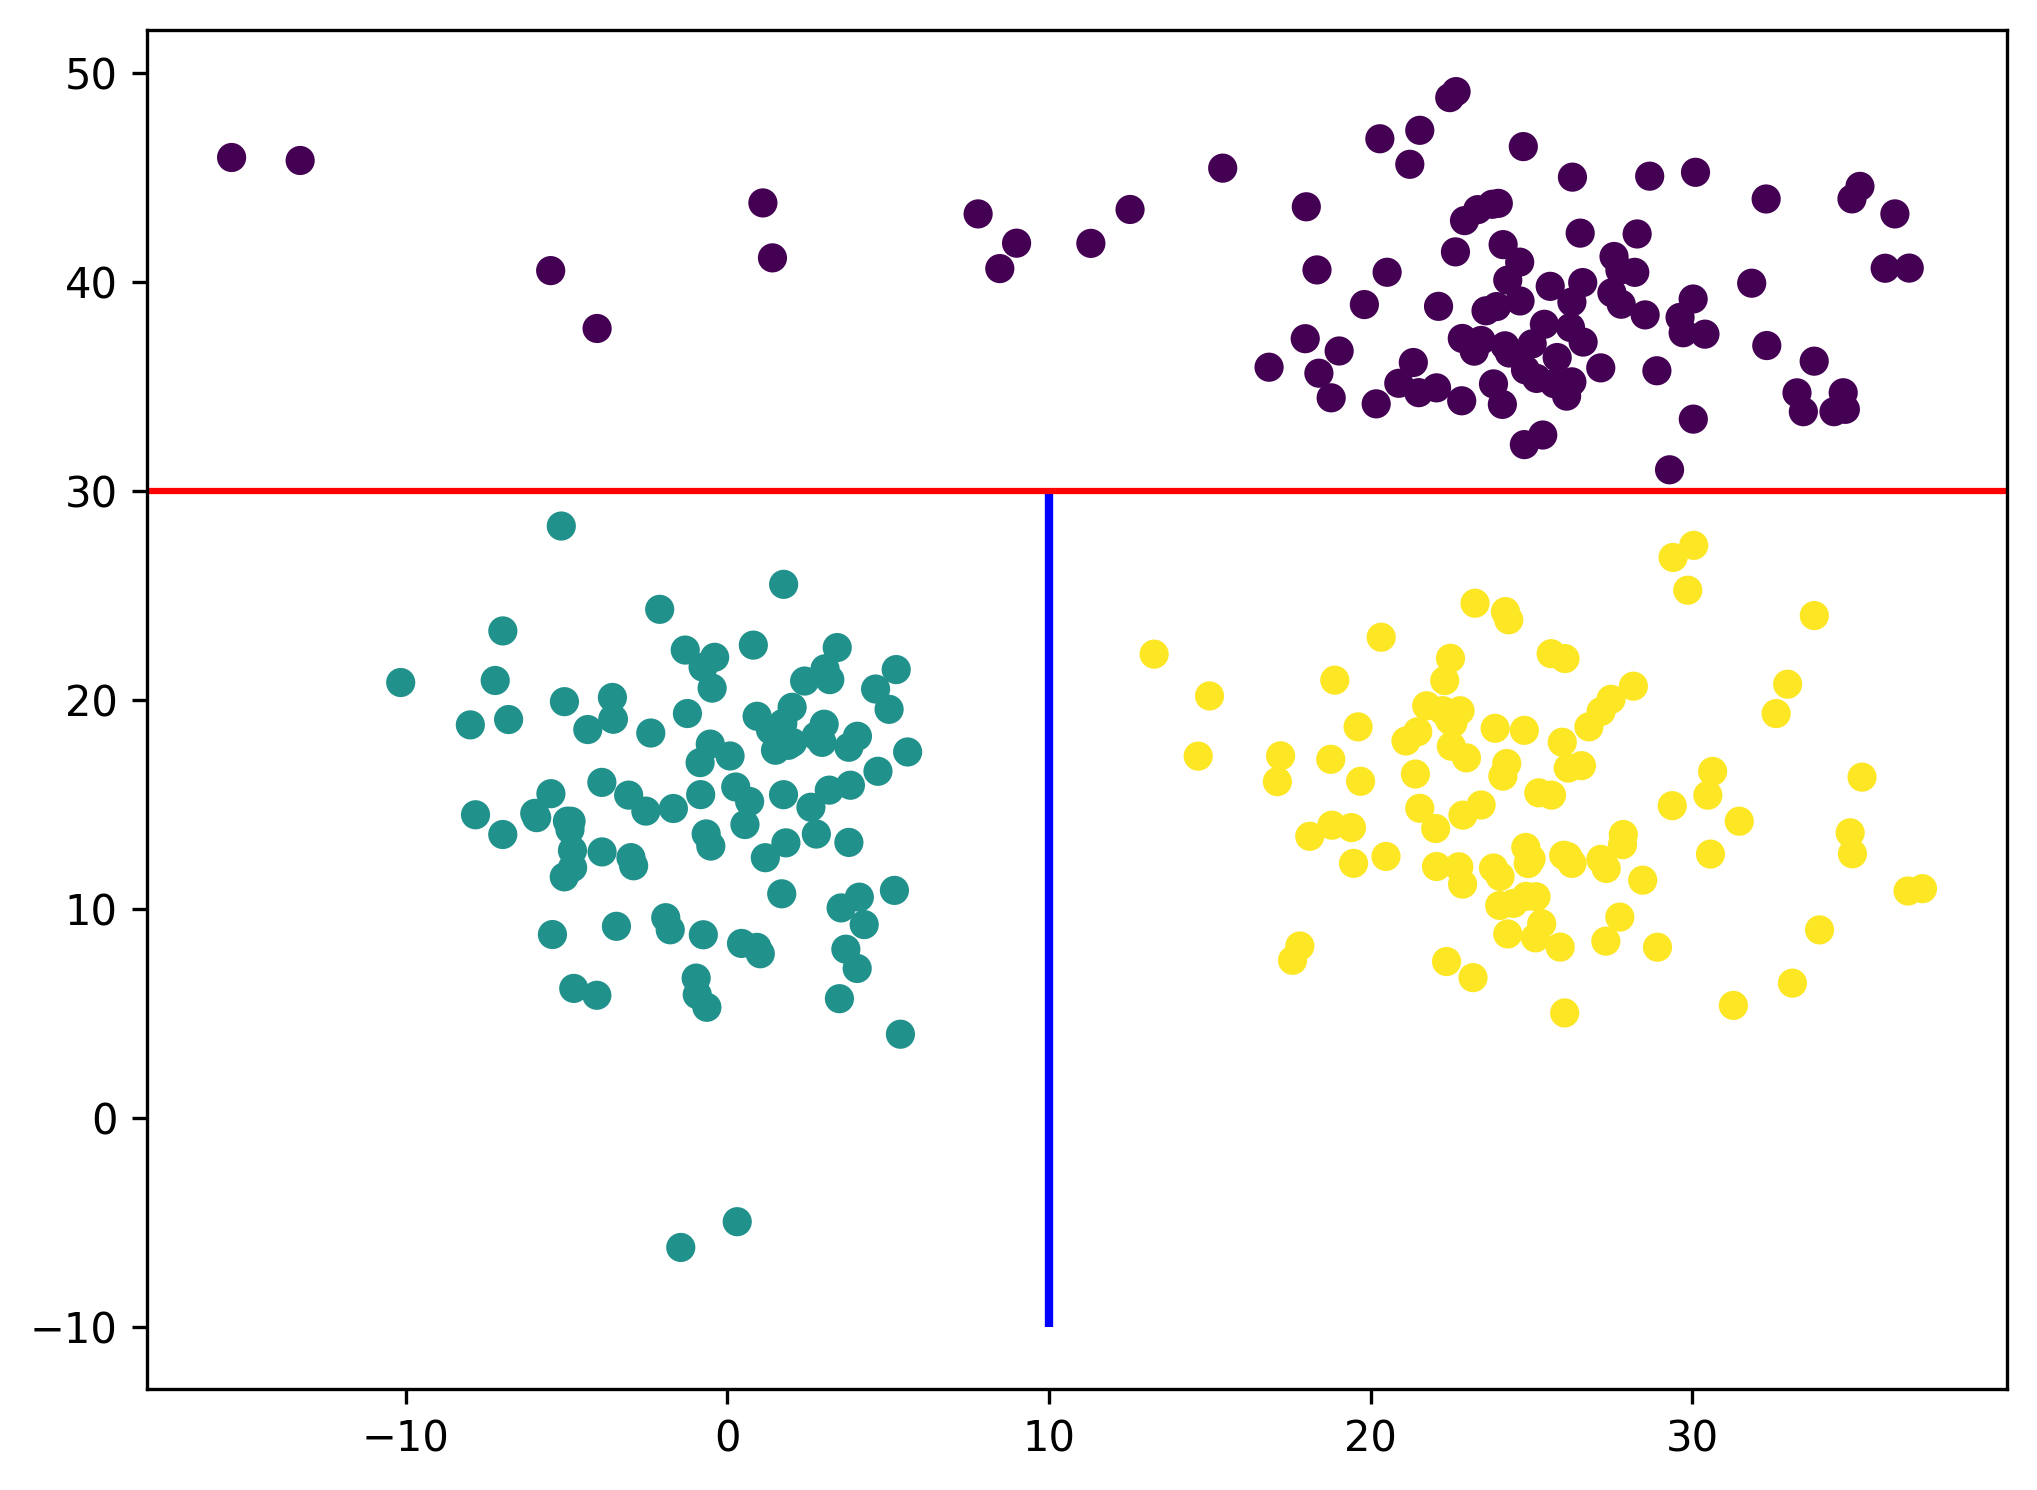

In [15]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=300)
X_, y_ = make_blobs(n_samples=300, centers=3, center_box=(0, 50.0), cluster_std=5, n_features=3, random_state=14)

for i in range(len(X_)):
    if y_[i] == 0 and X_[i, 1] < 31:
        X_[i,1] = X_[i,1] + 15
        X_[i,0] = X_[i,0] - 30
        
    elif y_[i] == 1 and X_[i, 0] > 8:
        X_[i,1] = X_[i,1] - 10
        X_[i,0] = X_[i,0] - 10


plt.scatter(X_[:, 0], X_[:, 1], c=y_)
plt.axhline(y=30, color='r', linestyle='-')
plt.vlines(x=10, ymin=-10, ymax = 30, linewidth=2, color='b')
plt.savefig("/home/trazom/Masters Project/OIST LaTeX Template Phd Thesis/Images/dtree.png")
plt.show()



In [16]:
x_d = Xx.copy()

In [17]:
x_d["Decision"] = wine["grade"].values
x_d

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  color  Decision  
0         9.4      1         0  
1         9.8      1         0  
2         9.8      1         0  
3         9.8      1         1  
4         9.4      1         0  
...       ...    ...       ...  
5315     11.2      0         1  
5316      9.6      0         0  
5317      9.4      0         1  
5318     12.8      0         1  
5319     11.8      0         1  

[5320 rows x 13 columns]

In [18]:
config = {'algorithm': 'CART'}

In [19]:
from sklearn import tree
from sklearn.metrics import accuracy_score
d_tree = tree.DecisionTreeClassifier(max_depth = 5)
d_tree = d_tree.fit(x_d.drop(['Decision'], axis=1), x_d["Decision"].values)

prediction = d_tree.predict(x_d.drop(['Decision'], axis=1))



accuracy = accuracy_score(prediction, x_d["Decision"].values)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")



Accuracy:  76.35 %


In [20]:
d_tree.feature_importances_

array([0.015438  , 0.17641211, 0.00959135, 0.00570162, 0.02437443,
       0.07636431, 0.02388919, 0.        , 0.        , 0.07804511,
       0.59018389, 0.        ])

In [21]:
d_tree_df = pd.DataFrame({"Feature_Importance": Xx.columns, 
              "value": list(d_tree.feature_importances_)})\
              .sort_values(by = ["value"], ascending=True)\
              .reset_index(drop=True)

d_tree_df.sort_values(by = ["value"], ascending=False).reset_index(drop=True)

Feature_Importance     value
0                alcohol  0.590184
1       volatile acidity  0.176412
2              sulphates  0.078045
3    free sulfur dioxide  0.076364
4              chlorides  0.024374
5   total sulfur dioxide  0.023889
6          fixed acidity  0.015438
7            citric acid  0.009591
8         residual sugar  0.005702
9                density  0.000000
10                    pH  0.000000
11                 color  0.000000

In [22]:
print(d_tree_df.sort_values(by = ["value"], ascending=False).reset_index(drop=True).to_latex(index=False))

\begin{tabular}{lr}
\toprule
  Feature\_Importance &    value \\
\midrule
             alcohol & 0.590184 \\
    volatile acidity & 0.176412 \\
           sulphates & 0.078045 \\
 free sulfur dioxide & 0.076364 \\
           chlorides & 0.024374 \\
total sulfur dioxide & 0.023889 \\
       fixed acidity & 0.015438 \\
         citric acid & 0.009591 \\
      residual sugar & 0.005702 \\
             density & 0.000000 \\
                  pH & 0.000000 \\
               color & 0.000000 \\
\bottomrule
\end{tabular}



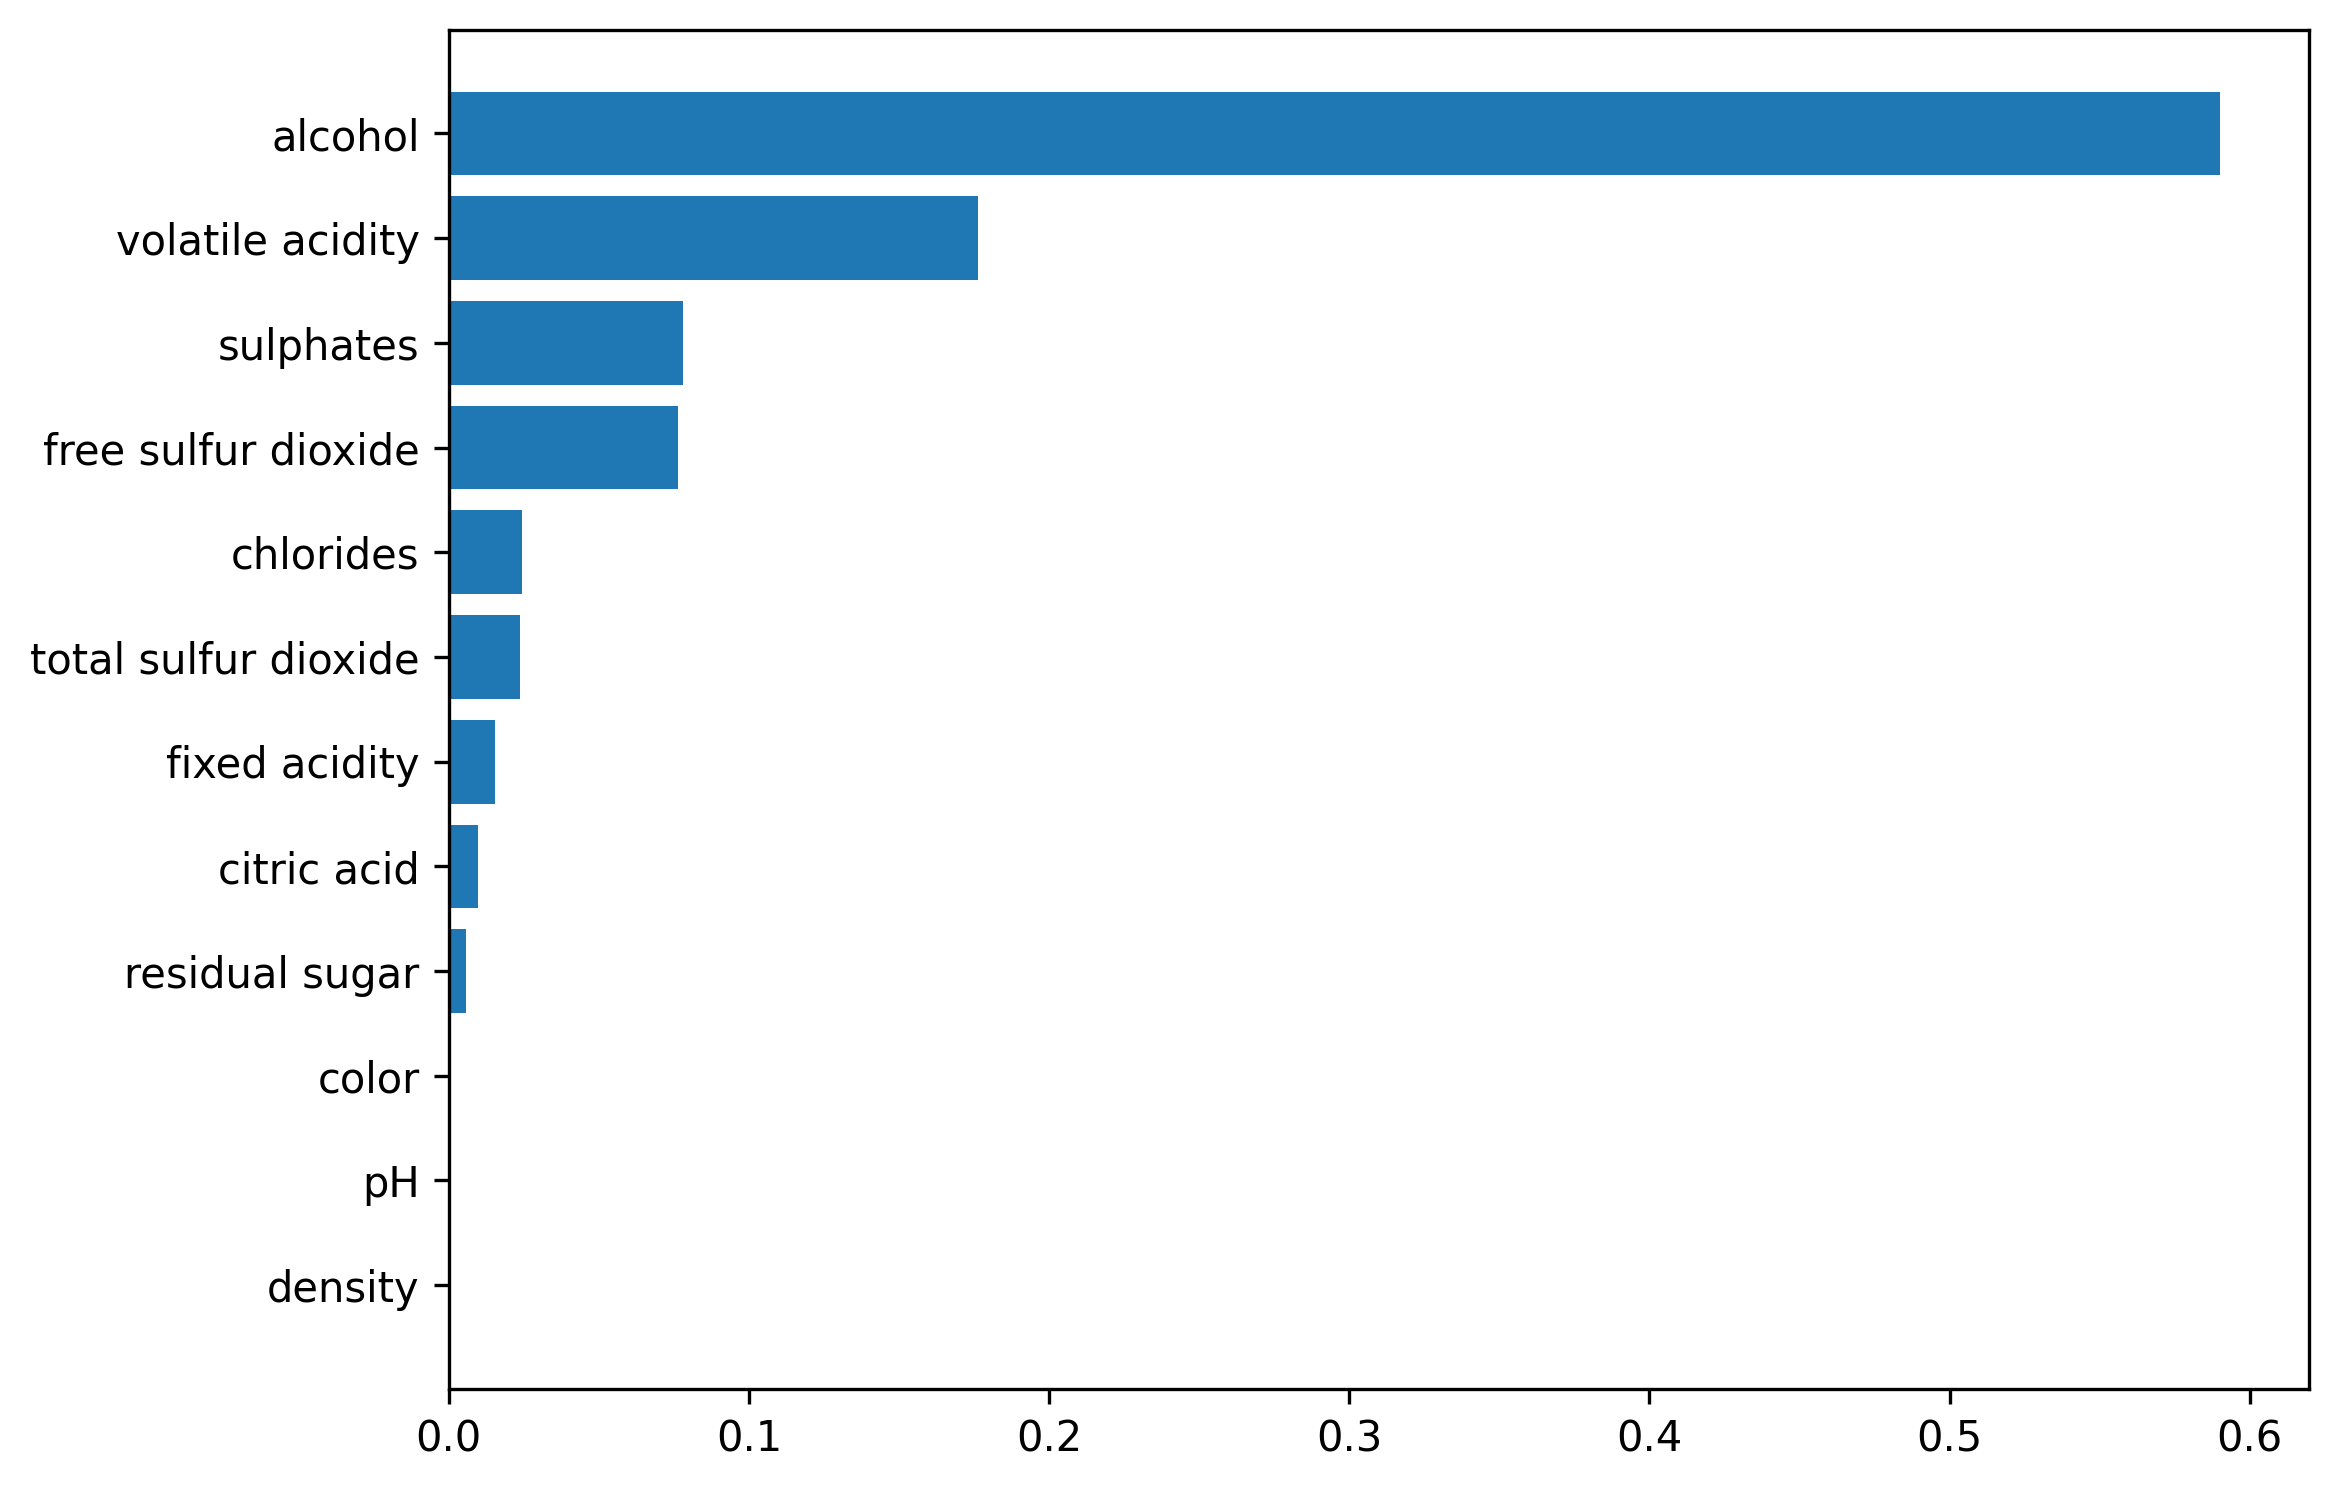

In [23]:
plt.figure(figsize=(8, 6), dpi=300)
plt.barh(d_tree_df["Feature_Importance"], d_tree_df["value"])
plt.savefig("/home/trazom/Masters Project/OIST LaTeX Template Phd Thesis/Images/dtree_importance.png")
plt.show()

In [24]:
min(wine["alcohol"])

8.0

## Partial Dependency Plots

In [25]:
def get_pdp(model, df, column):
    df = df.copy(deep=True) # Do not modify my original data
    quality = []
    steps = 10 # This is the number of steps to increase the feature 'column'
    unit_step = (max(df[column]) - min(df[column]))/steps

    minimum = min(df[column])

    for i in range(steps):
        df[column] = minimum + (i * unit_step)
        average = np.mean(model.predict(df).astype(float))
        quality.append(average)
    
    u_step = (max(wine[column]) - min(wine[column]))/steps

    return( pd.DataFrame({column.title(): [(min(wine[column]) + (i * u_step)) for i in range(steps)],
                          "Quality predicted": quality}))
    

In [26]:
pdp = get_pdp(model = lm, df = X, column = 'alcohol')
pdp

Alcohol  Quality predicted
0     8.00           5.208674
1     8.69           5.367557
2     9.38           5.526440
3    10.07           5.685324
4    10.76           5.844207
5    11.45           6.003091
6    12.14           6.161974
7    12.83           6.320857
8    13.52           6.479741
9    14.21           6.638624

In [27]:
print(pdp.to_latex(index=False))

\begin{tabular}{rr}
\toprule
 Alcohol &  Quality predicted \\
\midrule
    8.00 &           5.208674 \\
    8.69 &           5.367557 \\
    9.38 &           5.526440 \\
   10.07 &           5.685324 \\
   10.76 &           5.844207 \\
   11.45 &           6.003091 \\
   12.14 &           6.161974 \\
   12.83 &           6.320857 \\
   13.52 &           6.479741 \\
   14.21 &           6.638624 \\
\bottomrule
\end{tabular}



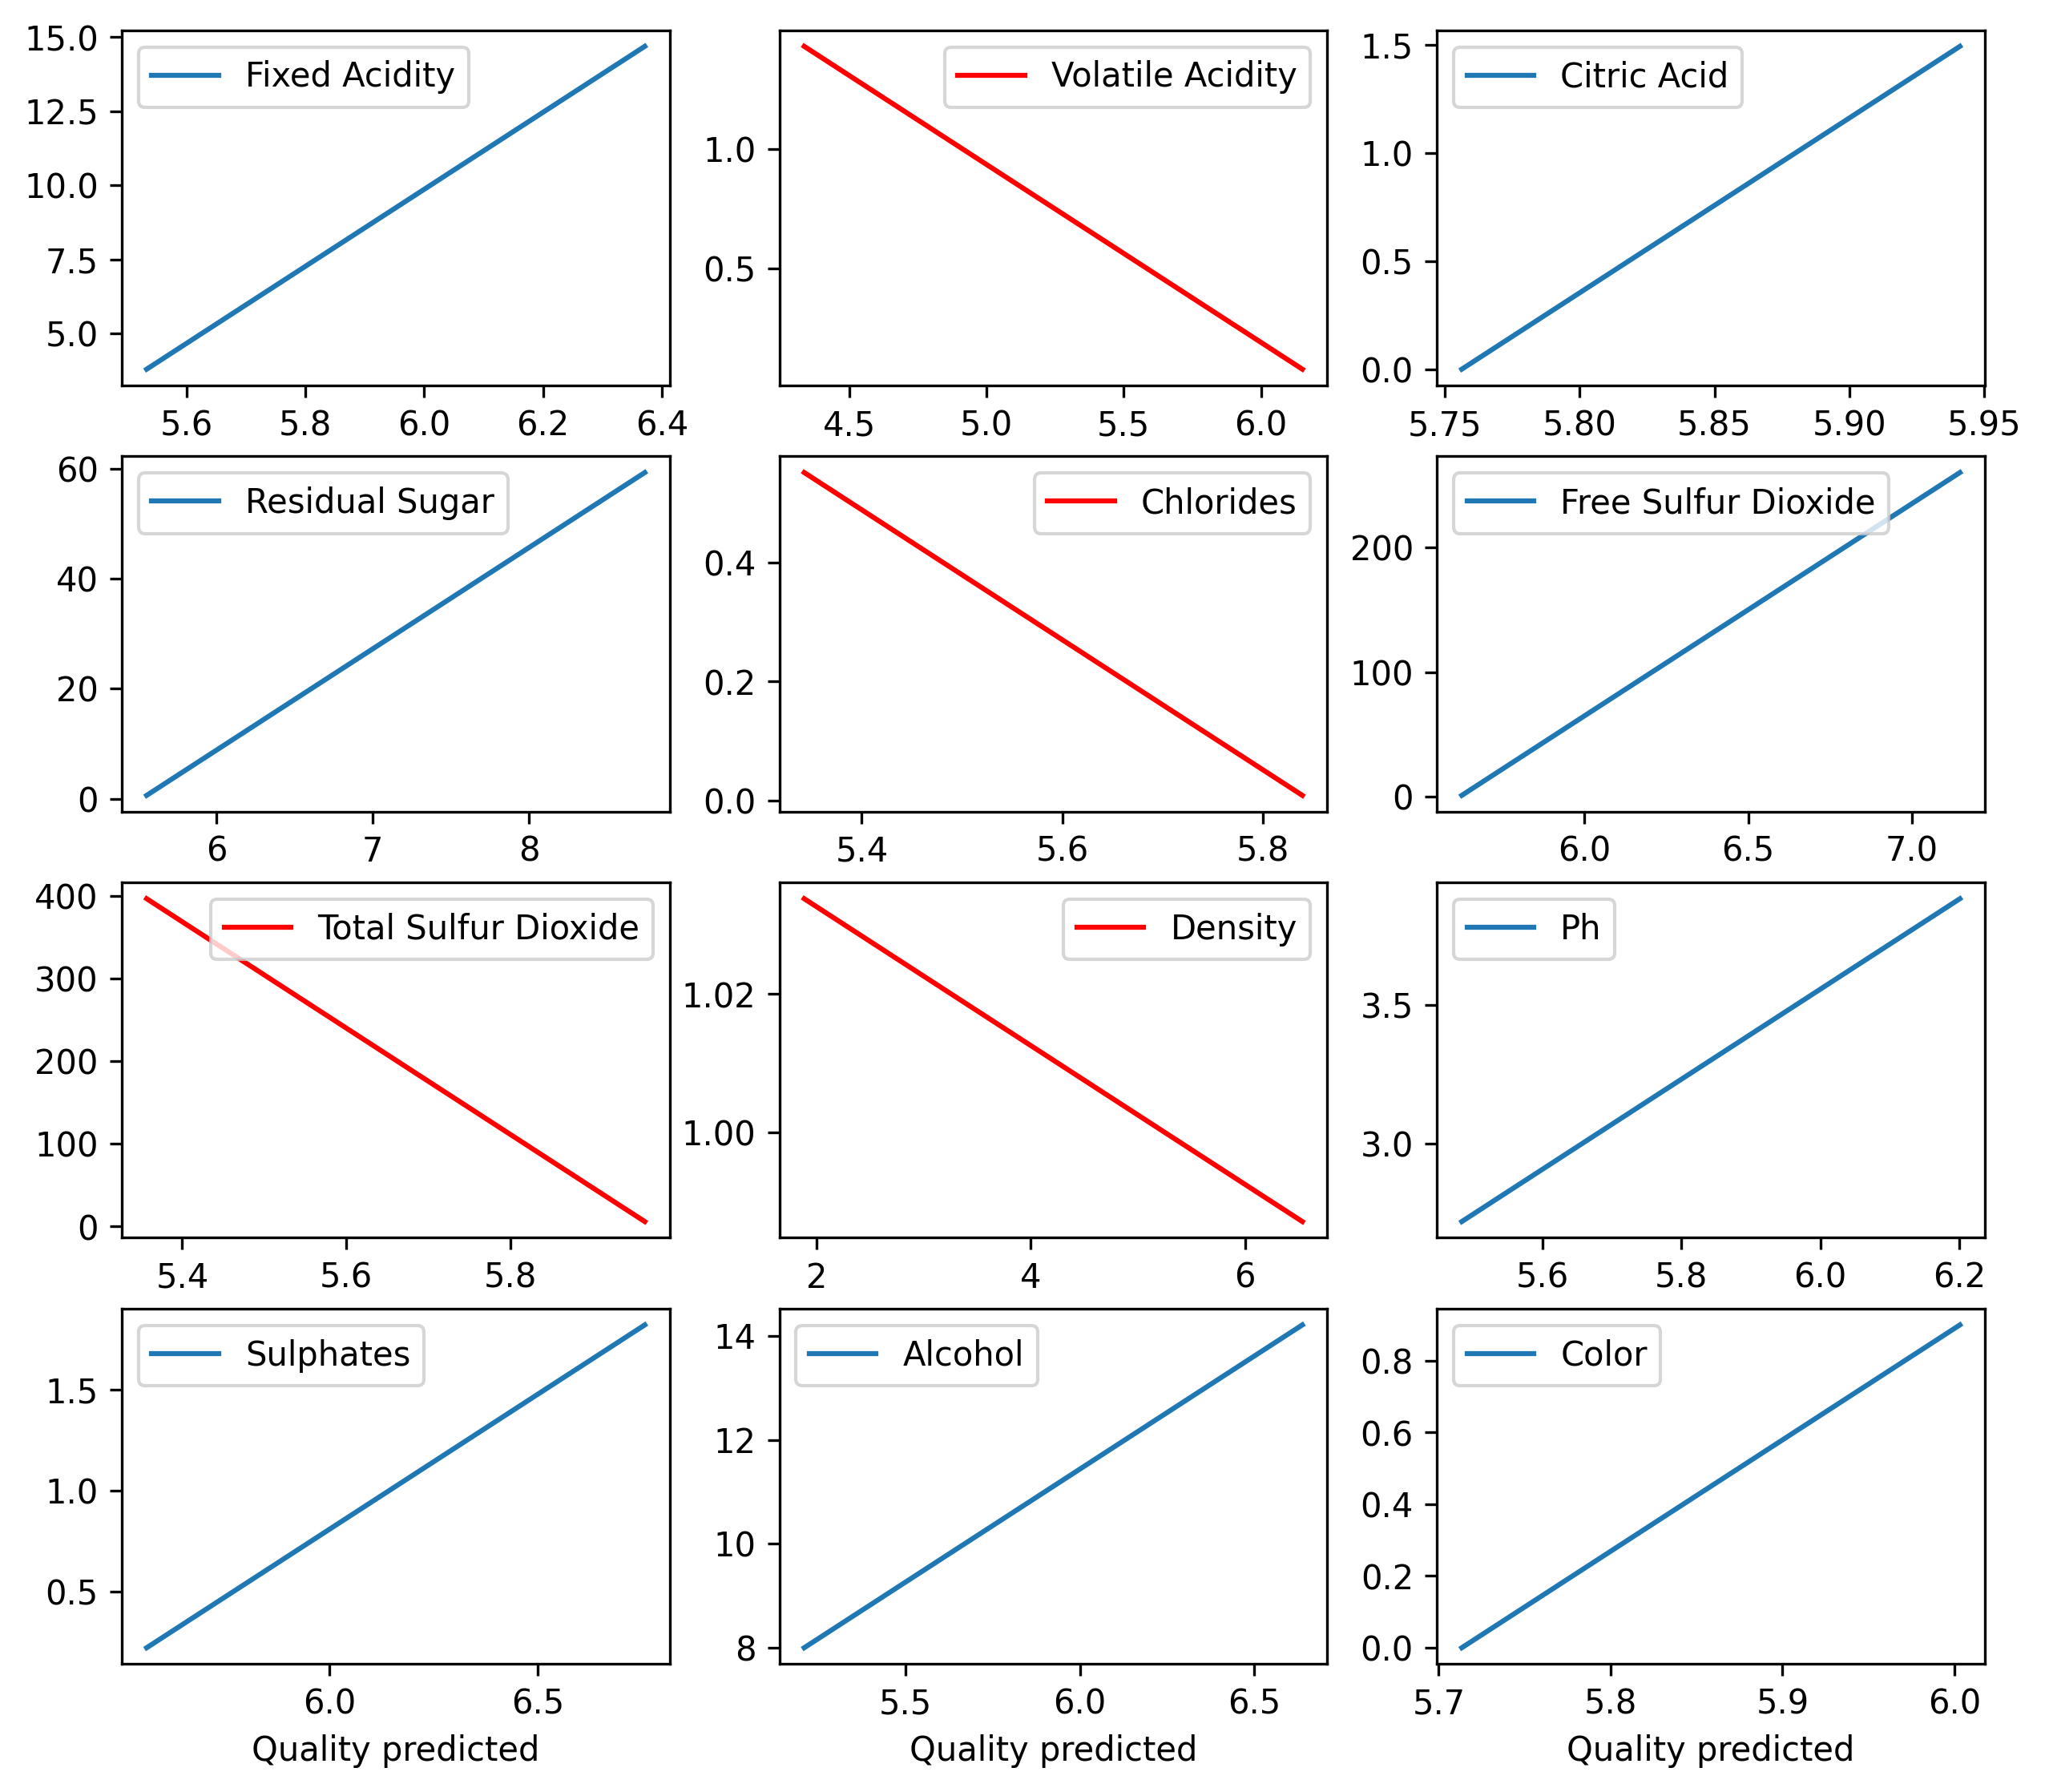

In [28]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 9), dpi=300)
neg_cols = {"Chlorides": 'r', 'Volatile Acidity':'r',
            'Total Sulfur Dioxide': 'r', 'Density': 'r'}
a = np.indices((4,3))
axis = []
for b in range(4):
    for c in range(3):
        axis.append((a[0][b][c], a[1][b][c]))

for i, col in enumerate(X.columns):
    get_pdp(model = lm, df = X, column = col).plot(x = 'Quality predicted', 
                                                   ax = axes[axis[i]],
                                                  style=neg_cols)
plt.savefig("/home/trazom/Masters Project/OIST LaTeX Template Phd Thesis/Images/pd_plots.png")

## Accumulated Local Effects:

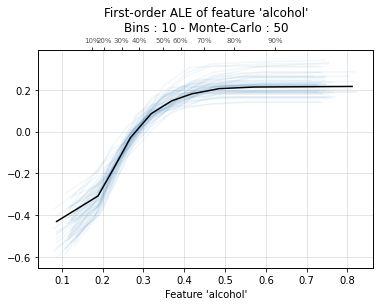

<AxesSubplot:title={'center':"First-order ALE of feature 'alcohol'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'alcohol'">

In [29]:
from alepython import ale_plot
from alibi.explainers import ALE, plot_ale
# Plots ALE of feature 'cont' with Monte-Carlo replicas (default : 50).
ale_plot(lr, X, 'alcohol', monte_carlo=True)

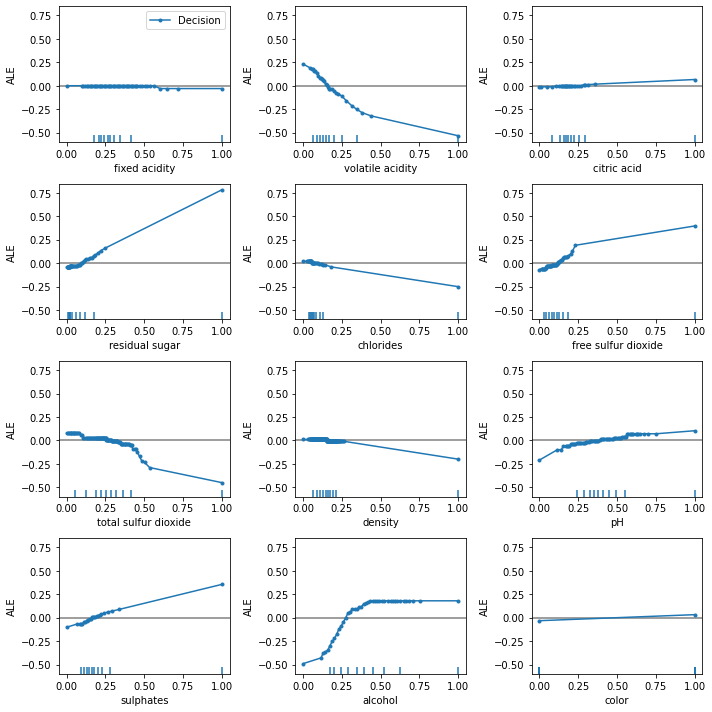

In [30]:
lr_ale = ALE(lr.predict, feature_names=X.columns, target_names = ['Decision'])
lr_exp = lr_ale.explain(np.array(X))
plot_ale(lr_exp, fig_kw={'figwidth': 10, 'figheight': 10})
plt.savefig("/home/trazom/Masters Project/OIST LaTeX Template Phd Thesis/Images/ale_plots.png")

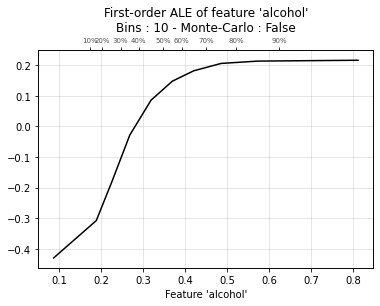

In [31]:
sss = ale_plot(lr, X, 'alcohol')

In [32]:
X.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.214752     0.330328   
volatile acidity           0.214752          1.000000    -0.384192   
citric acid                0.330328         -0.384192     1.000000   
residual sugar            -0.104439         -0.163696     0.146189   
chlorides                  0.288918          0.367626     0.055199   
free sulfur dioxide       -0.281590         -0.349039     0.130849   
total sulfur dioxide      -0.327471         -0.400716     0.194835   
density                    0.478180          0.308452     0.094758   
pH                        -0.271182          0.246687    -0.344735   
sulphates                  0.304844          0.227772     0.059183   
alcohol                   -0.102573         -0.065411    -0.005496   
color                      0.486253          0.645335    -0.183759   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.104439   0.288918            -0.281590   
volatile acidity           -0.163696   0.367626            -0.349039   
citric acid                 0.146189   0.055199             0.130849   
residual sugar              1.000000  -0.123094             0.398717   
chlorides                  -0.123094   1.000000            -0.186615   
free sulfur dioxide         0.398717  -0.186615             1.000000   
total sulfur dioxide        0.487519  -0.269817             0.720488   
density                     0.520930   0.371867             0.006166   
pH                         -0.234522   0.025823            -0.141747   
sulphates                  -0.174717   0.405051            -0.198244   
alcohol                    -0.305242  -0.269601            -0.170012   
color                      -0.328695   0.499517            -0.465326   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.327471  0.478180 -0.271182   0.304844   
volatile acidity                 -0.400716  0.308452  0.246687   0.227772   
citric acid                       0.194835  0.094758 -0.344735   0.059183   
residual sugar                    0.487519  0.520930 -0.234522  -0.174717   
chlorides                        -0.269817  0.371867  0.025823   0.405051   
free sulfur dioxide               0.720488  0.006166 -0.141747  -0.198244   
total sulfur dioxide              1.000000  0.006711 -0.222956  -0.275836   
density                           0.006711  1.000000  0.034273   0.282690   
pH                               -0.222956  0.034273  1.000000   0.168150   
sulphates                        -0.275836  0.282690  0.168150   1.000000   
alcohol                          -0.249004 -0.667811  0.097314  -0.017232   
color                            -0.694229  0.429377  0.310919   0.490364   

                       alcohol     color  
fixed acidity        -0.102573  0.486253  
volatile acidity     -0.065411  0.645335  
citric acid          -0.005496 -0.183759  
residual sugar       -0.305242 -0.328695  
chlorides            -0.269601  0.499517  
free sulfur dioxide  -0.170012 -0.465326  
total sulfur dioxide -0.249004 -0.694229  
density              -0.667811  0.429377  
pH                    0.097314  0.310919  
sulphates            -0.017232  0.490364  
alcohol               1.000000 -0.057756  
color                -0.057756  1.000000

In [33]:
## Permutation Importance

In [34]:
from sklearn.metrics import mean_squared_error

def get_pis(model, X, y):
    
    rmse_full_mod = mean_squared_error(model.predict(X), y, squared = False)
    
    # Initialize a list of results
    results = []# Iterate through each predictor
    for predictor in X:

        # Create a copy of X_test
        X_copy = X.copy()

        # Scramble the values of the given predictor
        X_copy[predictor] = X[predictor].sample(frac=1).values

        # Calculate the new RMSE
        new_rmse = mean_squared_error(model.predict(X_copy), y,
                                      squared = False)

        # Append the increase in MSE to the list of results 
        results.append({'pred': predictor,
                        'score': new_rmse - rmse_full_mod })# Convert to a pandas dataframe and rank the predictors by score
    return pd.DataFrame(results).sort_values(by = 'score', ascending = False, ignore_index = True)


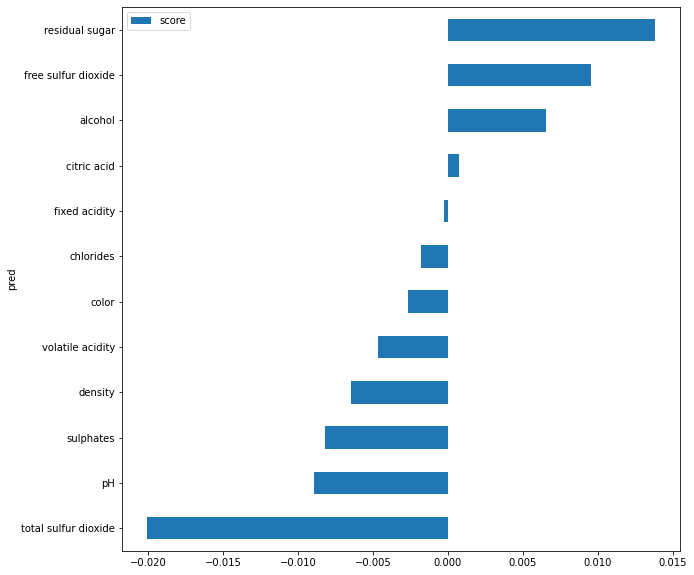

In [35]:
get_pis(lr, X, y).sort_values(by = 'score', ascending = True).plot.barh(x = 'pred', figsize=(10, 10))
plt.savefig("/home/trazom/Masters Project/OIST LaTeX Template Phd Thesis/Images/fi_plots.png")

In [36]:
len(X)

5320

## Individual Conditional Expectation

Computing partial dependence plots...
done in 1.657s


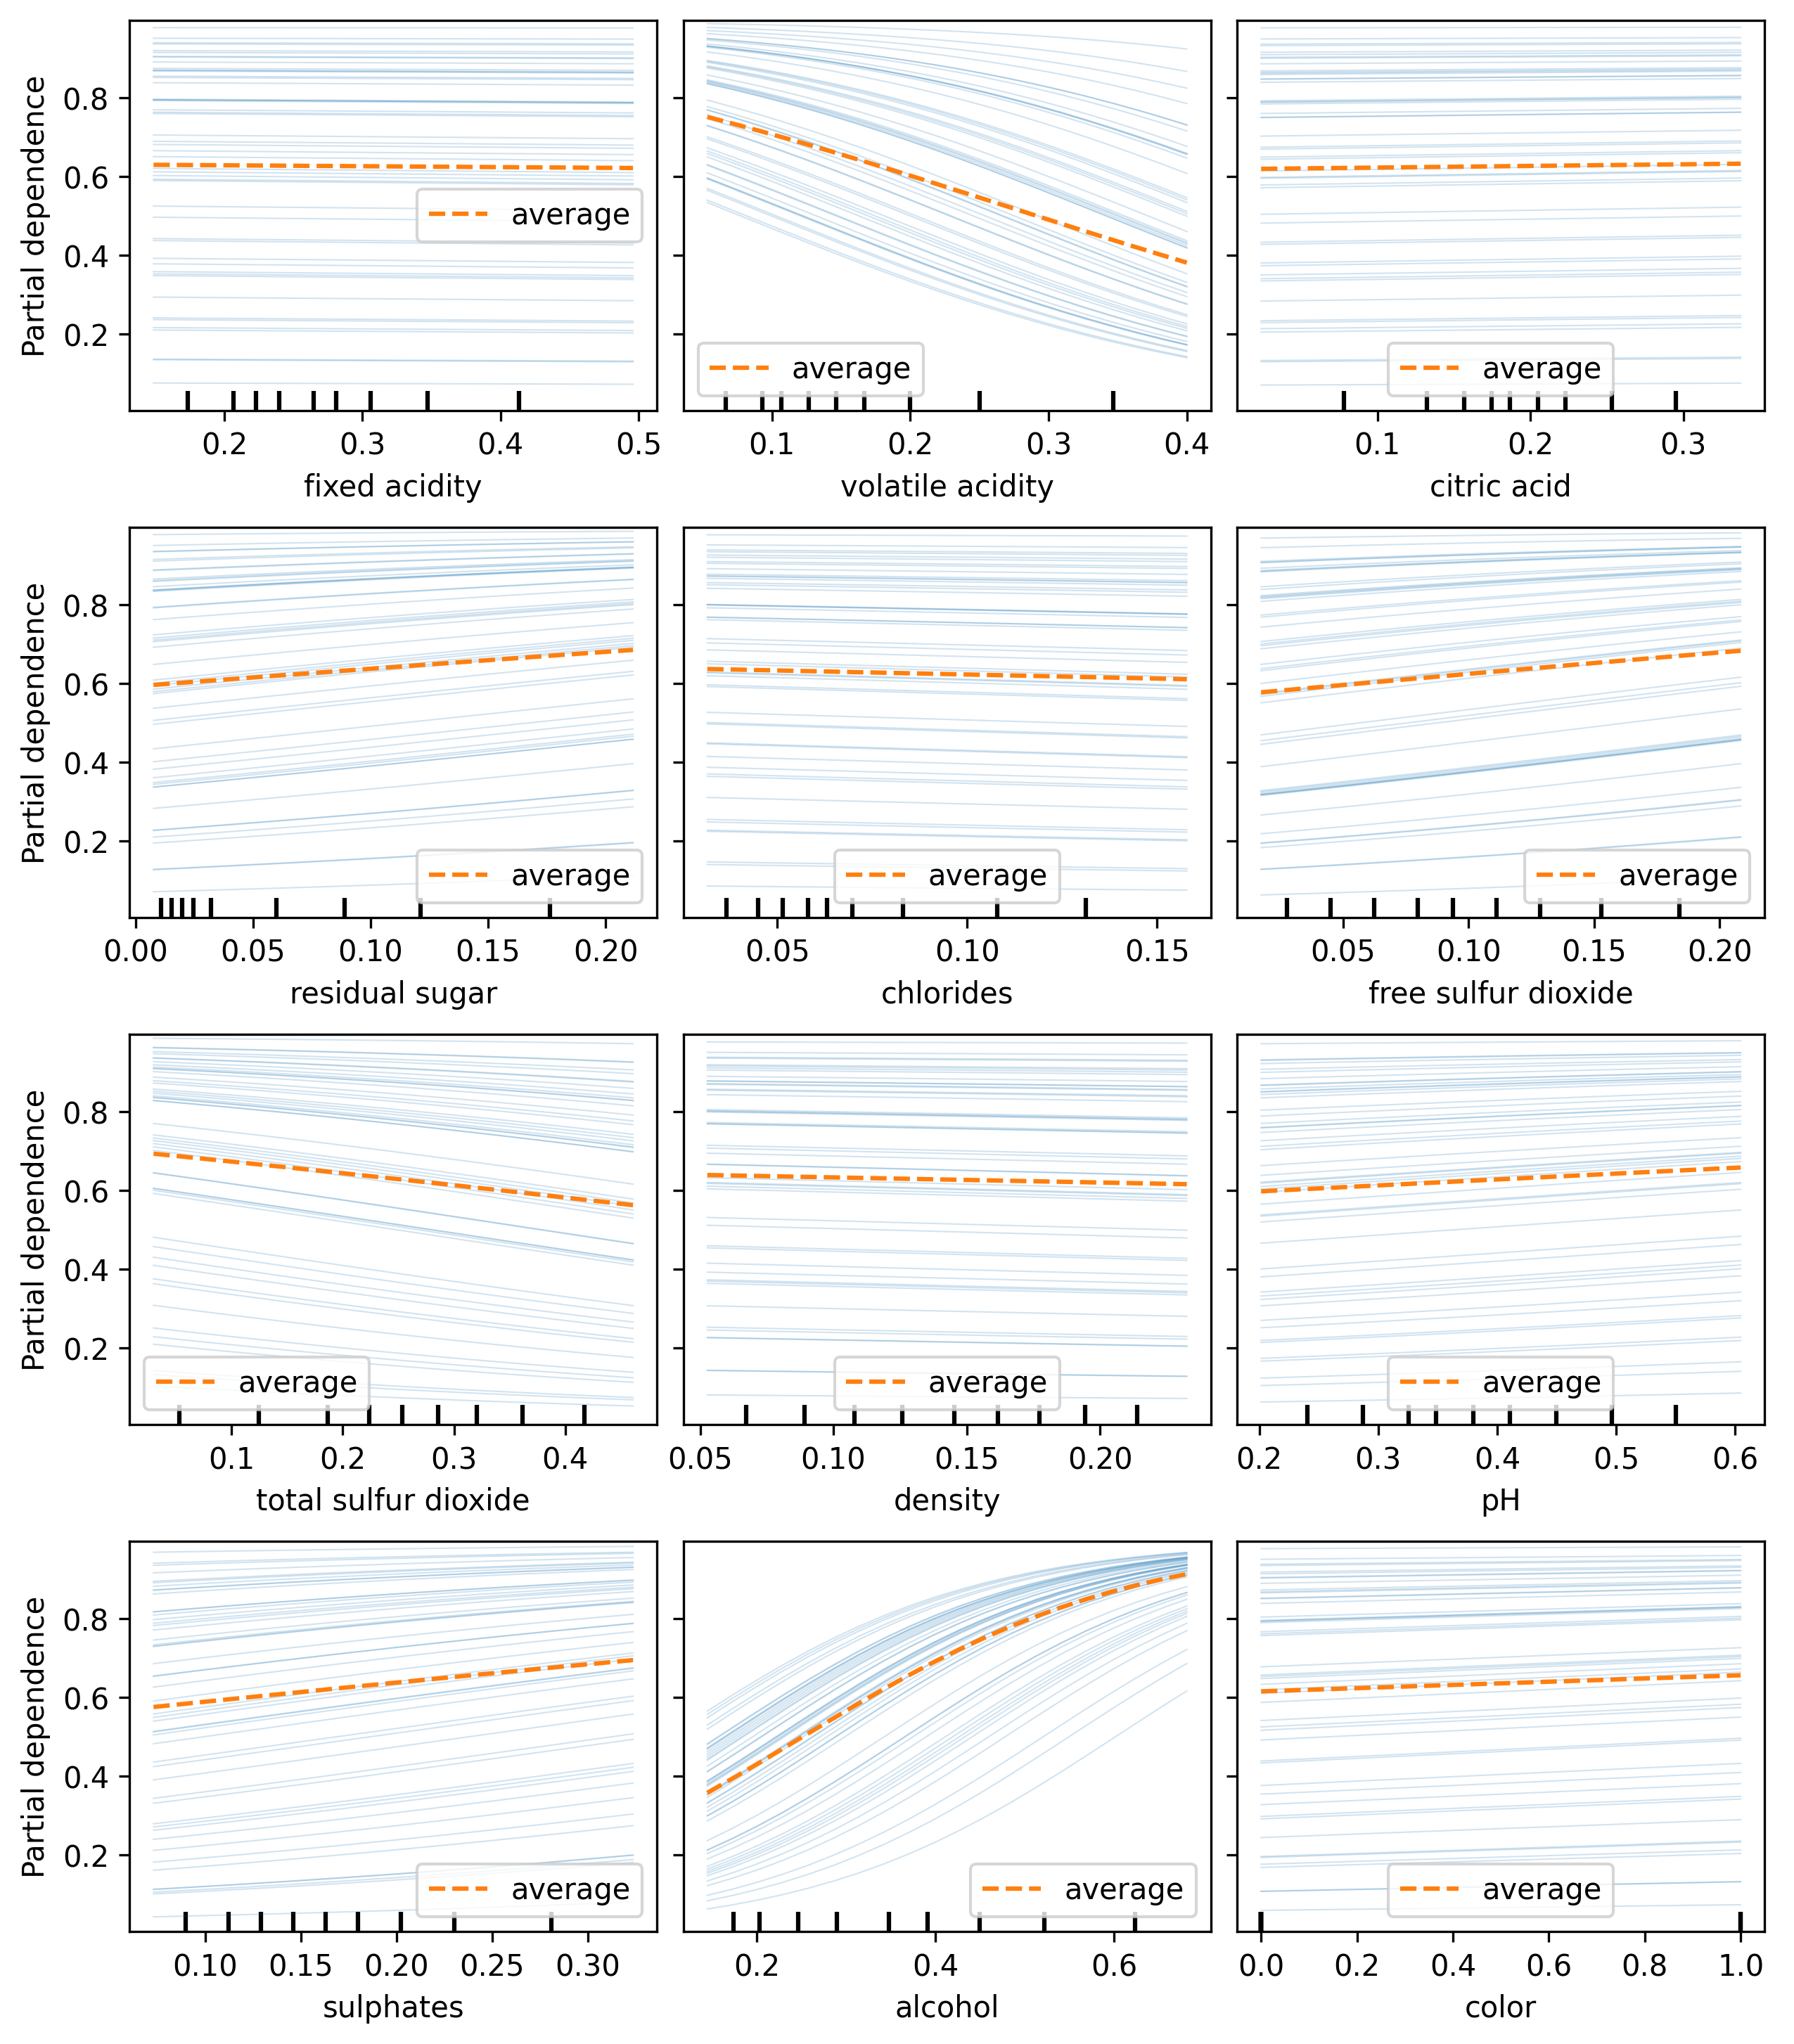

In [37]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from time import time

print("Computing partial dependence plots...")
tic = time()
features = X.columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 12), dpi=300)

display = PartialDependenceDisplay.from_estimator(
    lr,
    X,
    features,
    ax = axes,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--" },
)
print(f"done in {time() - tic:.3f}s")

display.figure_.subplots_adjust(wspace=0.05, hspace=0.3)

plt.savefig("/home/trazom/Masters Project/OIST LaTeX Template Phd Thesis/Images/ice_plots.png")


In [38]:
a = 0
import textract, re
text = textract.process("/home/trazom/Masters Project/OIST LaTeX Template Phd Thesis/Thesis.pdf").decode("utf-8")
words = re.findall(r"[^\W_]+", text, re.MULTILINE) # regex demo and explanation - https://regex101.com/r/U7WMSA/1

print(len(words) - a)
a = len(words)
a

12328


12328

In [39]:
# %% Apply lime
from interpret.blackbox import LimeTabular
from interpret import show

# Initilize Lime for Tabular data
lime = LimeTabular(predict_fn=lm.predict, 
                   data=X, 
                   random_state=1)
# Get local explanations
#lime_local = lime.explain_local(X[-20:], 
#                                y[-20:], 
#                                name='LIME')

lime_local = lime.explain_local(X[1000:1020], 
                                y[1000:1020], 
                                name='LIME')

        
show(lime_local)

# %%



<!-- http://127.0.0.1:7001/140631215256096/ -->

In [40]:
X.iloc[-10, ]

fixed acidity           0.247934
volatile acidity        0.093333
citric acid             0.216867
residual sugar          0.009202
chlorides               0.071429
free sulfur dioxide     0.128472
total sulfur dioxide    0.278802
density                 0.119337
pH                      0.248062
sulphates               0.179775
alcohol                 0.173913
color                   0.000000
Name: 5310, dtype: float64

# Some Existing Libraries in Python for XAI

## The libraries were tried out on the breast_cancer_dataset trained on XGBoost model 

# A guide to some Packages in Python to Explain Your Models

## Let us build  a model first.

In [41]:
# Import libraries
import pandas as pd
# import the dataset from Sklearn
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Read the DataFrame, first using the feature data
data = load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target

# Show the first five rows
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

Let’s build a basic Xgboost model which we will be using going forward across the various packages.

In [42]:
from xgboost import XGBClassifier

# Set up the data for modelling 
y=df['target'].to_frame() # define Y
X=df[df.columns.difference(['target'])] # define X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # create train and test

# build model - Xgboost
xgb_mod=XGBClassifier(random_state=42, gpu_id=0, 
                      use_label_encoder=False, 
                      eval_metric = 'logloss') # build classifier
xgb_mod=xgb_mod.fit(X_train,y_train.values.ravel()) 

# make prediction and check model accuracy 
y_pred = xgb_mod.predict(X_test)

# Performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.37%


### 1. SHAP

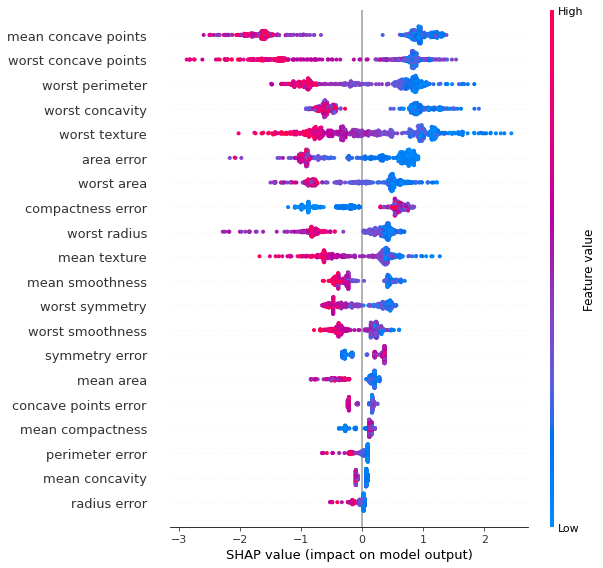

In [43]:
import shap

# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

############## visualizations #############
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot")

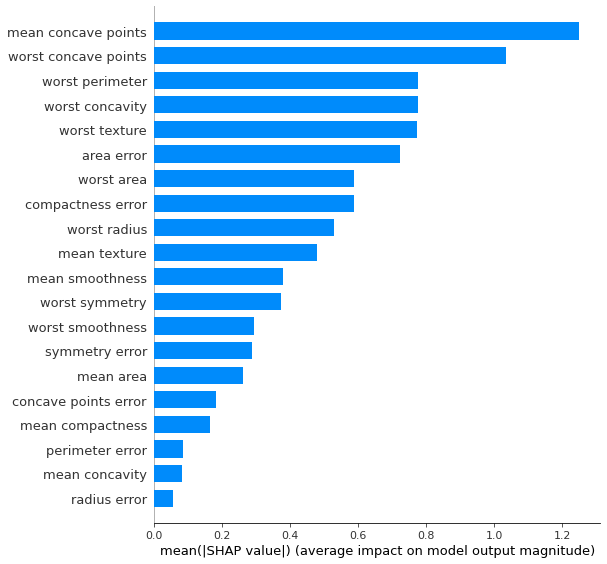

In [44]:
# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar") 

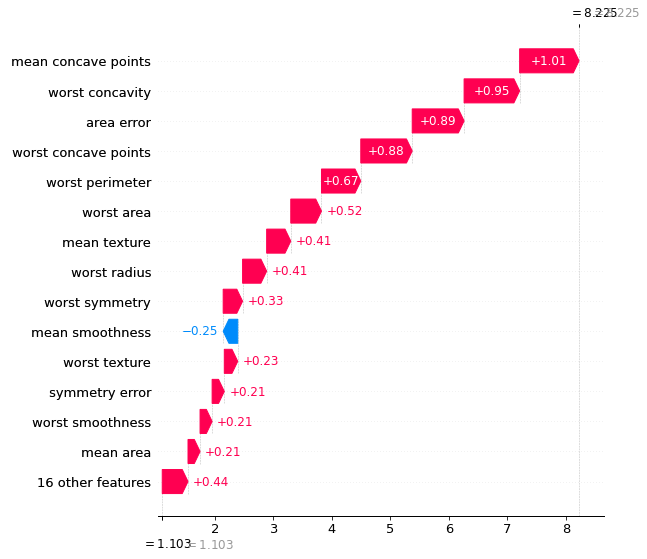

In [45]:
# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[79], features=X.loc[79,:], feature_names=X.columns, max_display=15, show=True)

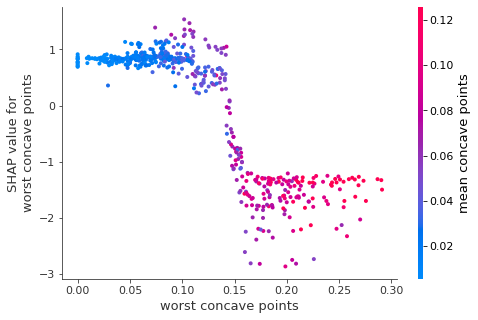

In [46]:
# Generate dependence plot
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

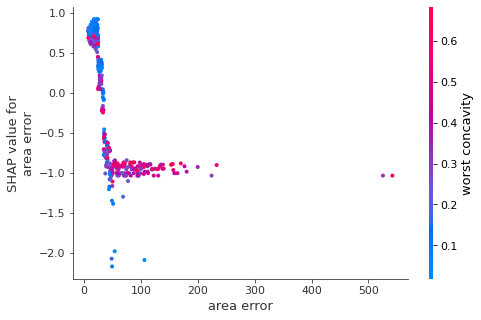

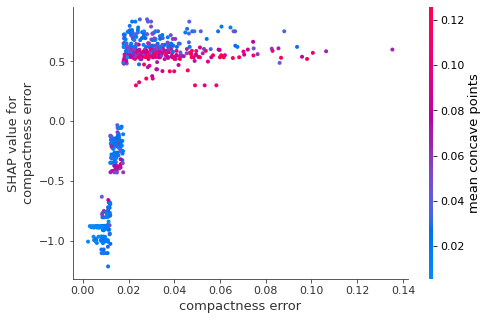

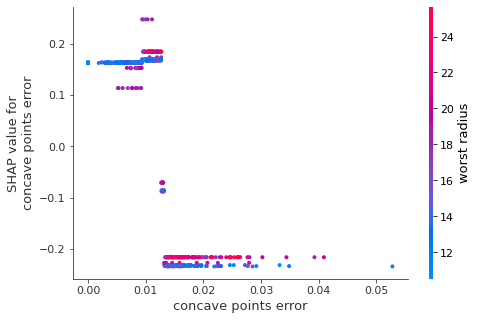

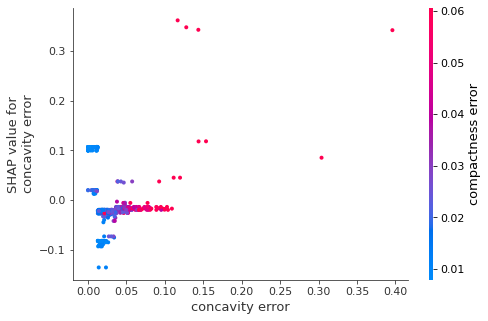

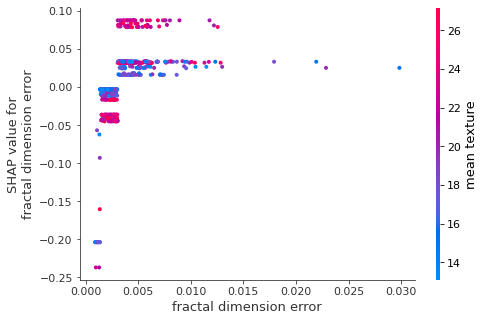

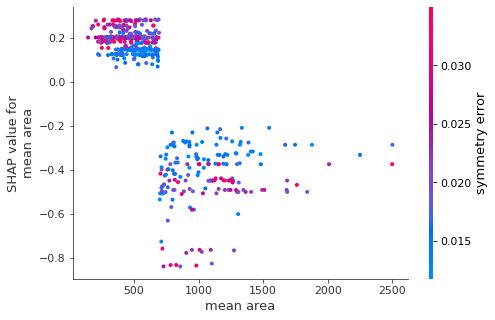

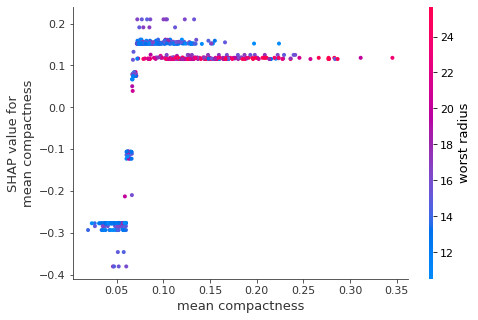

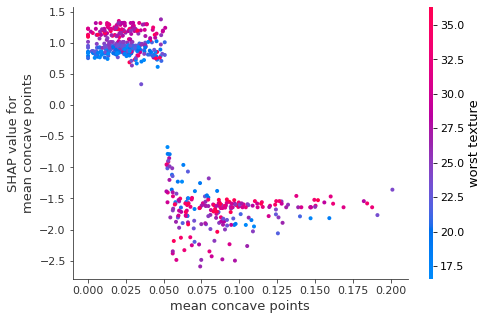

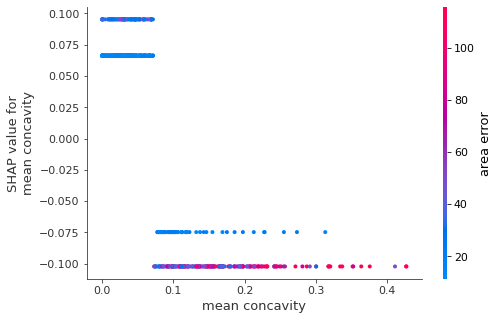

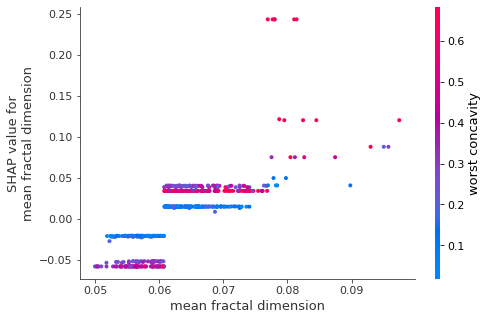

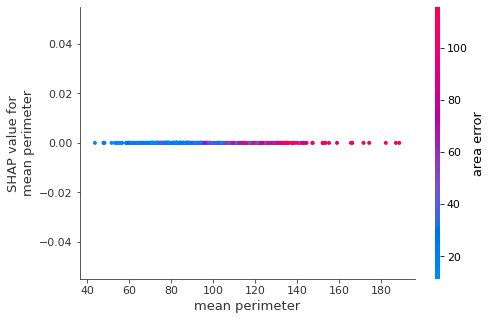

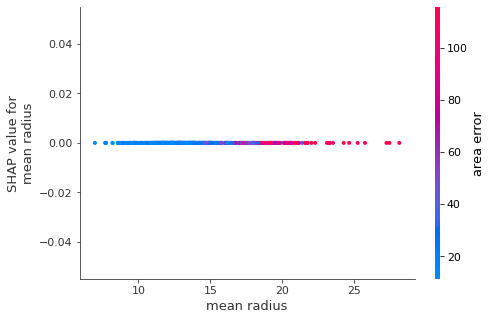

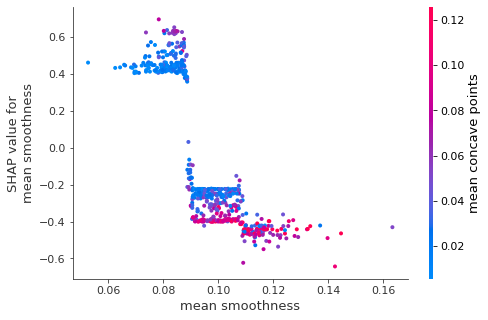

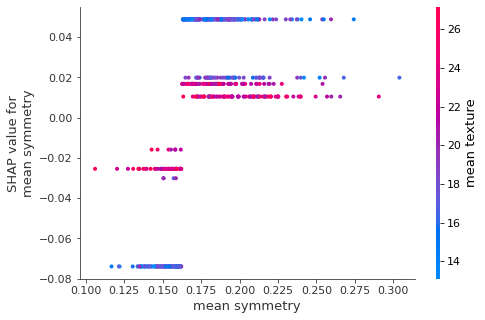

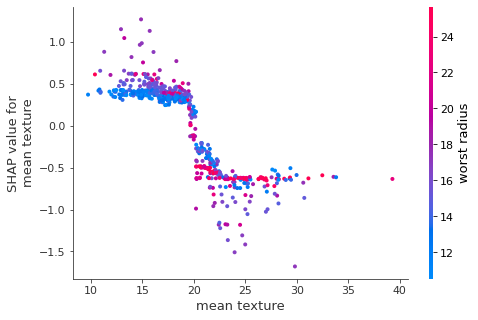

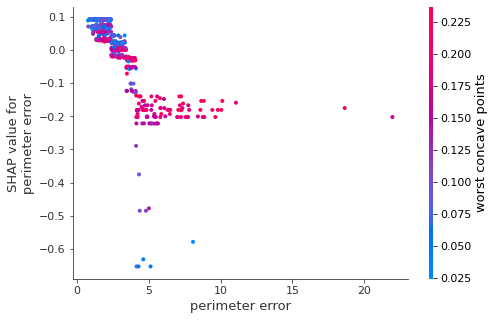

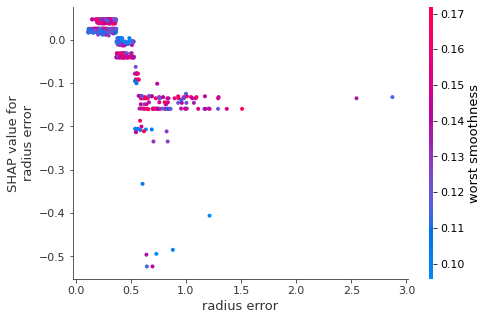

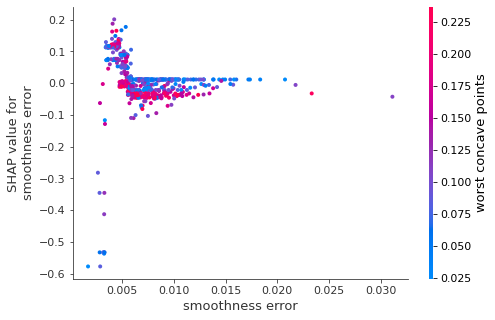

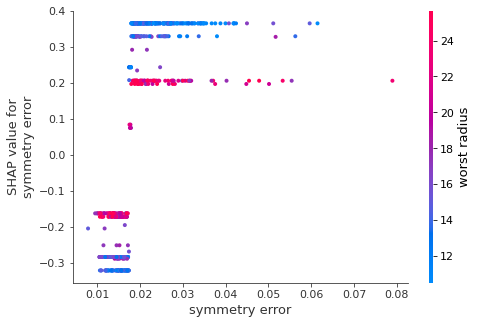

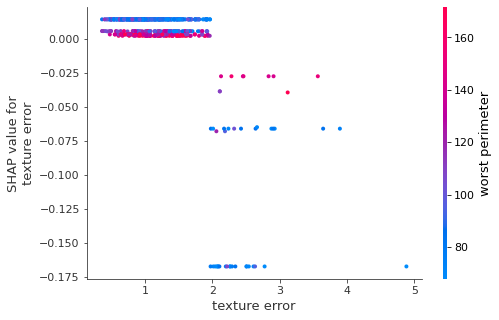

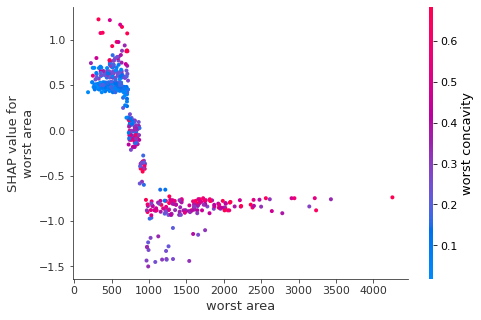

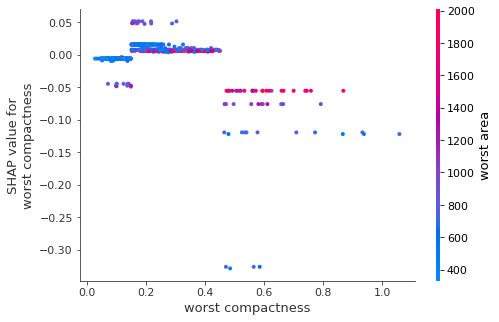

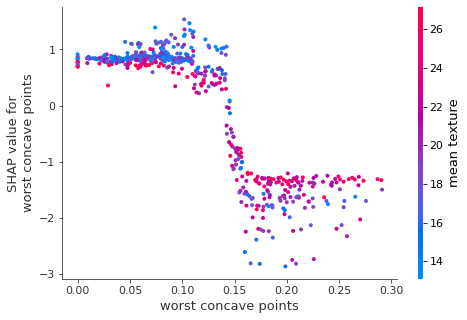

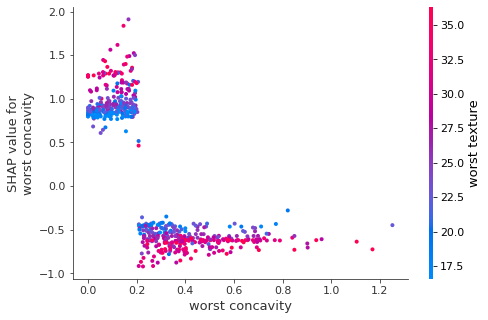

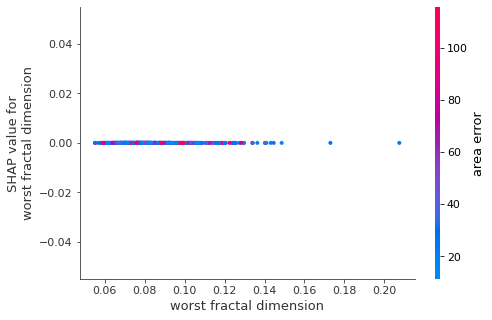

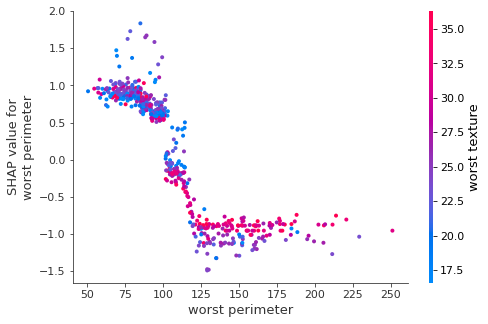

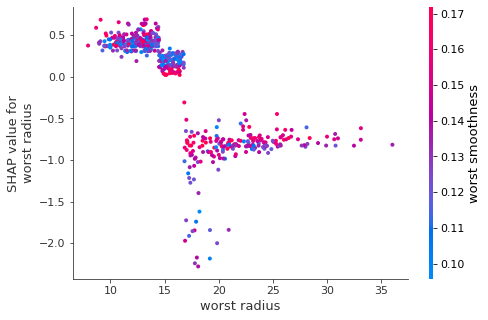

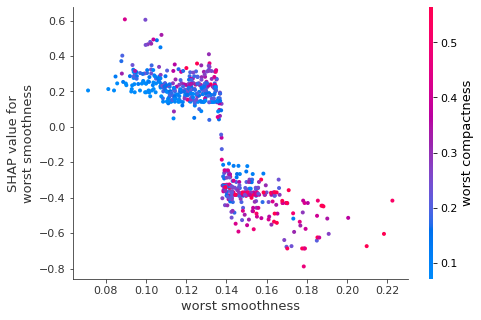

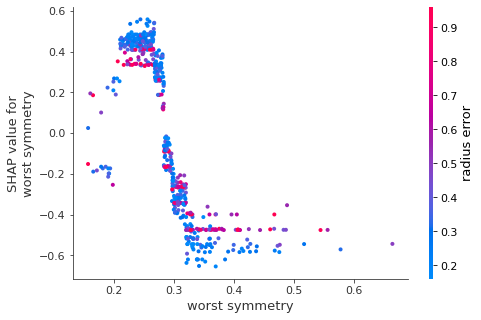

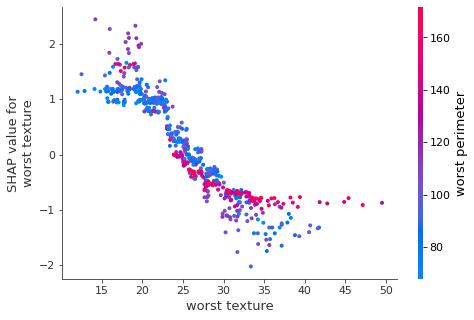

In [47]:
# Generate multiple dependence plots
for name in X_train.columns:
     shap.dependence_plot(name, shap_values, X)


In [48]:
# Generate force plot - Multiple rows 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:100,:], X.iloc[:100,:])

In [49]:
# Generate force plot - Single
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

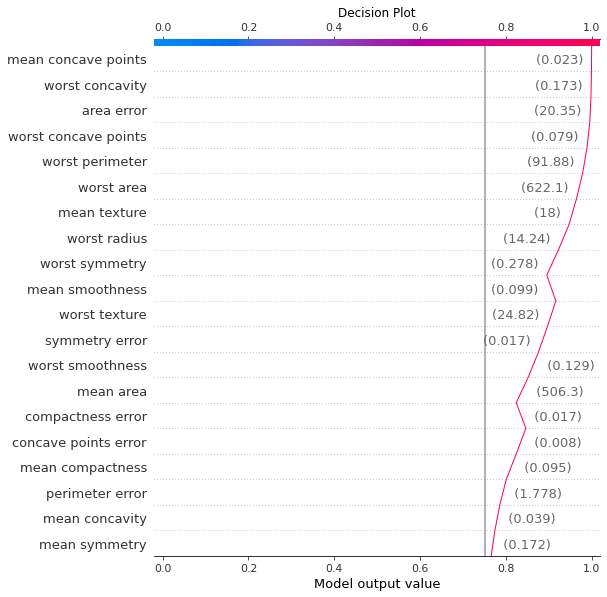

In [50]:
# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[79],link='logit' ,features=X.loc[79,:], feature_names=(X.columns.tolist()),show=True,title="Decision Plot")

In [51]:
# Utilizing our same xgb_mod model object created above
# Import pacakages
from lime import lime_tabular as lt
import numpy as np


############## create explainer ###########
# we use the dataframes splits created above for SHAP
explainer = lt.LimeTabularExplainer(X_test.to_numpy(), 
                                    feature_names=X_test.columns, 
                                    class_names=['0','1'], verbose=True)

############## visualizations #############
exp = explainer.explain_instance(X_test.to_numpy()[79], xgb_mod.predict_proba, 
                                 num_features=20)
exp.show_in_notebook(show_table=True)

Intercept 0.44227653326276173
Prediction_local [1.14430915]
Right: 0.99759597


## Shapash

In [52]:
# Utilizing our same xgb_mod model object created above
############## load packages ############

import shapash
from shapash.utils.load_smartpredictor import load_smartpredictor
from shapash.explainer.smart_explainer import SmartExplainer


In [53]:
############## launch the app #############
# create explainer
xpl = SmartExplainer()
xpl.compile(x=X_test, model=xgb_mod)

#Creating Application
app = xpl.run_app(title_story='Breast Cancer')

############## visualizations #############
# feature importance based on SHAP
xpl.plot.features_importance()

# contributions plot
xpl.plot.contribution_plot("worst concave points")

# Local explanation
xpl.plot.local_plot(index=79)

# compare plot 
xpl.plot.compare_plot(index=[X_test.index[79], X_test.index[80]])

# Interactive interactions widget 
xpl.plot.top_interactions_plot(nb_top_interactions=5)

# save contributions
predictor = xpl.to_smartpredictor()
predictor.add_input(x=X_train, ypred=y_train)
detailed_contributions = predictor.detail_contributions()

Backend: Shap TreeExplainer
Dash is running on http://0.0.0.0:8050/



/home/trazom/venvs/Machine_Learning/lib/python3.8/site-packages/pandas/core/frame.py:1549: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

INFO:root:Your Shapash application run on http://trazom-OMEN-Laptop-15-ek0xxx:8050/
INFO:root:Use the method .kill() to down your app.
INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app 'shapash.webapp.smart_app' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://192.168.0.10:8050/ (Press CTRL+C to quit)


In [54]:
# Utlizing our same xgb_model object created above
# import the packages 
import explainerdashboard as expdb
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard import InlineExplainer
from explainerdashboard.custom import (ImportancesComposite,
                                       IndividualPredictionsComposite,
                                       WhatIfComposite,
                                       ShapDependenceComposite,
                                       ShapInteractionsComposite,
                                       DecisionTreesComposite)

# Create the explainer object
explainer = ClassifierExplainer(xgb_mod, X_test, y_test, model_output='logodds')

# Create individual component plants using Inexplainer

ie = InlineExplainer(explainer, port=8081)

# SHAP overview
ie.shap.overview()

# SHAP interactions
ie.shap.interaction_dependence()

# Model Stats
ie.classifier.model_stats()

# SHAP contribution
ie.shap.contributions_graph()

# SHAP dependence
ie.shap.dependence()

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Calculating shap values...


In [ ]:
db = ExplainerDashboard(explainer, 
                        title="Breast cancer Explainer", # defaults to "Model Explainer"
                        shap_interaction=False, # you can switch off tabs with bools
                        )
db.run(port=8082)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Generating xgboost model dump...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.0.10:8082


# 5. Dalex

In [ ]:
# Utilizing our same xgb_mod model object created above

############## load packages ############

import dalex as dx

explainer = dx.Explainer(xgb_mod, X, y) # create explainer from Dalex

############## visualizations #############
# Generate importance plot showing top 30
explainer.model_parts().plot(max_vars=30)

# Generate ROC curve for xgboost model object
explainer.model_performance(model_type='classification').plot(geom='roc')

# Generate breakdown plot
explainer.predict_parts(X.iloc[79, :]).plot(max_vars=15)

# Generate SHAP plot 
explainer.predict_parts(X.iloc[79, :],type="shap").plot(min_max=[0,1],max_vars=15)

# Generate breakdown interactions plot 
explainer.predict_parts(X.iloc[79, :], type='break_down_interactions').plot(max_vars=20)

# Generate residual plots
explainer.model_performance(model_type = 'classification').plot()

# Generate PDP plots for all variables 
explainer.model_profile(type = 'partial', label="pdp").plot()

# Generate Accumulated Local Effects plots for all variables 
explainer.model_profile(type = 'ale', label="pdp").plot()

# Generate Individual Conditional Expectation plots for worst texture variable 
explainer.model_profile(type = 'conditional', label="conditional",variables="worst texture")

# Generate lime breakdown plot
explainer.predict_surrogate(X.iloc[[79]]).plot()

####### start Arena dashboard #############
# create empty Arena
arena=dx.Arena()

# push created explainer
arena.push_model(explainer)

# push whole test dataset (including target column)
arena.push_observations(X_test)

# run server on port 9294
arena.run_server(port=9291)

# 6. Explainable Boosting Machines (EBM)

In [ ]:
# Building a new EBM model
############## load packages ############
# import packages

from interpret.perf import ROC
from interpret import show
from interpret.glassbox import ExplainableBoostingClassifier

############## create EBM model #############
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

############## visualizations #############

# Generate global explanability visuals
global_exp=ebm.explain_global()
show(global_exp)

# Generate local explanability visuals
ebm_local = ebm.explain_local(X, y)
show(ebm_local)

# Generate EDA visuals 
hist = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
show(hist)

# Package it all in one Dashboard , see image below
show([hist, ebm_local, ebm_perf,global_exp], share_tables=True)

# https://interpret.ml/docs/ebm.html
# https://towardsdatascience.com/the-explainable-boosting-machine-f24152509ebb

# 7. ELI5

In [ ]:
import eli5
from eli5 import show_weights
from eli5 import show_prediction
from eli5.sklearn import PermutationImportance

############## visualizations #############
# Generate  global importances - ['weight', 'gain', 'cover', 'total_gain', 'total_cover'] - options for importance type
show_weights(xgb_mod,importance_type = 'total_gain')

# Local level explanation 
eli5.show_prediction(xgb_mod, X_test.iloc[1],
                    feature_names=list(X.columns),
                    show_feature_values=True)

# permutation based importance 
# sorted(sklearn.metrics.SCORERS.keys()) to check for options for scoring in Permutation importance
perm = PermutationImportance(xgb_mod,scoring="roc_auc_ovr_weighted")
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names=list(X.columns))